In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [14]:
data1 = pd.read_csv("/content/health_lifestyle_dataset.csv")
data1.head()

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,1,56,Male,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,2,69,Female,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,3,46,Male,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,4,32,Female,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,5,60,Female,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0


In [27]:
data1['gender'] = data1['gender'].astype('category').cat.codes
data1.dtypes

,0
id,int64
age,int64
gender,int8
bmi,float64
daily_steps,int64
sleep_hours,float64
water_intake_l,float64
calories_consumed,int64
smoker,int64
alcohol,int64


In [28]:
x1 = data1.drop('disease_risk',axis=1)
y1 = data1['disease_risk']
print(data1['disease_risk'].unique())
data1.isnull().sum()

[0 1]


,0
id,0
age,0
gender,0
bmi,0
daily_steps,0
sleep_hours,0
water_intake_l,0
calories_consumed,0
smoker,0
alcohol,0


In [29]:
data1.dtypes

,0
id,int64
age,int64
gender,int8
bmi,float64
daily_steps,int64
sleep_hours,float64
water_intake_l,float64
calories_consumed,int64
smoker,int64
alcohol,int64


In [30]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state=42)

In [37]:
# data1 - entropy w/o pruning
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x1_train,y1_train)
pred = dt.predict(x1_test)
trainingacc = dt.score(x1_train,y1_train)
print(f"entropy training acc: {trainingacc:.2f}")
print(f"entropy testing acc: {accuracy_score(y1_test,pred):.2f}")

entropy training acc: 1.00
entropy testing acc: 0.62


In [38]:
# data1 - entrpy with pruning
dt = DecisionTreeClassifier(criterion='entropy',ccp_alpha=0.015)
dt.fit(x1_train,y1_train)
pred1 = dt.predict(x1_test)
print(f"entropy training acc with pruning: {dt.score(x1_train,y1_train):.2f}")
print(f"entropy testing acc with pruning: {accuracy_score(y1_test,pred1):.2f}")

entropy training acc with pruning: 0.75
entropy testing acc with pruning: 0.75


In [42]:
# data1 - gini w/o pruning
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(x1_train,y1_train)
pred2 = dt.predict(x1_test)
print(f"gini training acc: {dt.score(x1_train,y1_train):.2f}")
print(f"gini testing acc: {accuracy_score(y1_test,pred2):.2f}")

gini training acc: 1.00
gini testing acc: 0.62


In [43]:
# data1 - gini with pruning
dt = DecisionTreeClassifier(criterion='gini',ccp_alpha=0.015)
dt.fit(x1_train,y1_train)
pred = dt.predict(x1_test)
print(f"gini training acc with pruning: {dt.score(x1_train,y1_train):.2f}")
print(f"gini testing acc with pruning: {accuracy_score(y1_test,pred):.2f}")

gini training acc with pruning: 0.75
gini testing acc with pruning: 0.75


In [44]:
data2 = pd.read_csv("/content/breast-cancer-wisconsin-data.csv")
data2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [45]:
data2.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [46]:
print(data2['diagnosis'].unique())

['M' 'B']


In [49]:
data2['diagnosis']=data2['diagnosis'].astype('category').cat.codes
print(data2['diagnosis'].unique())

[1 0]


In [50]:
x2 = data2.drop('diagnosis',axis=1)
y2 = data2['diagnosis']

In [51]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=0.2,random_state=42)

In [52]:
# data2 - entropy w/o pruning
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x2_train,y2_train)
pred = dt.predict(x2_test)
print(f"entropy training acc: {dt.score(x2_train,y2_train):.2f}")
print(f"entropy testing acc: {accuracy_score(y2_test,pred):.2f}")

entropy training acc: 1.00
entropy testing acc: 0.93


In [53]:
# data2 - entropy w pruning
dt = DecisionTreeClassifier(criterion='entropy',ccp_alpha=0.015)
dt.fit(x2_train,y2_train)
pred = dt.predict(x2_test)
print(f"entropy training acc: {dt.score(x2_train,y2_train):.2f}")
print(f"entropy testing acc: {accuracy_score(y2_test,pred):.2f}")

entropy training acc: 0.99
entropy testing acc: 0.96


In [54]:
# data2 - gini w/o pruniing
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(x2_train,y2_train)
pred = dt.predict(x2_test)
print(f"gini traing acc: {dt.score(x2_train,y2_train):.2f}")
print(f"gini testing acc: {accuracy_score(y2_test,pred):.2f}")

gini traing acc: 1.00
gini testing acc: 0.94


In [55]:
# data2 - gini with pruning
dt = DecisionTreeClassifier(criterion='gini',ccp_alpha=0.015)
dt.fit(x2_train,y2_train)
pred = dt.predict(x2_test)
print(f"gini traing acc pruning: {dt.score(x2_train,y2_train):.2f}")
print(f"gini testing acc with pruning: {accuracy_score(y2_test,pred):.2f}")

gini traing acc pruning: 0.96
gini testing acc with pruning: 0.95


In [56]:
# Correct vs Wrong Predictions for Data2
dt.fit(x2_train, y2_train)
y2_pred = dt.predict(x2_test)

correct = (y2_pred == y2_test).sum()
total = len(y2_test)
wrong = total - correct

print(f"Correctly Predict: {correct} Out of {total}")
print(f"Wrong Predictions: {wrong}")


Correctly Predict: 109 Out of 114
Wrong Predictions: 5


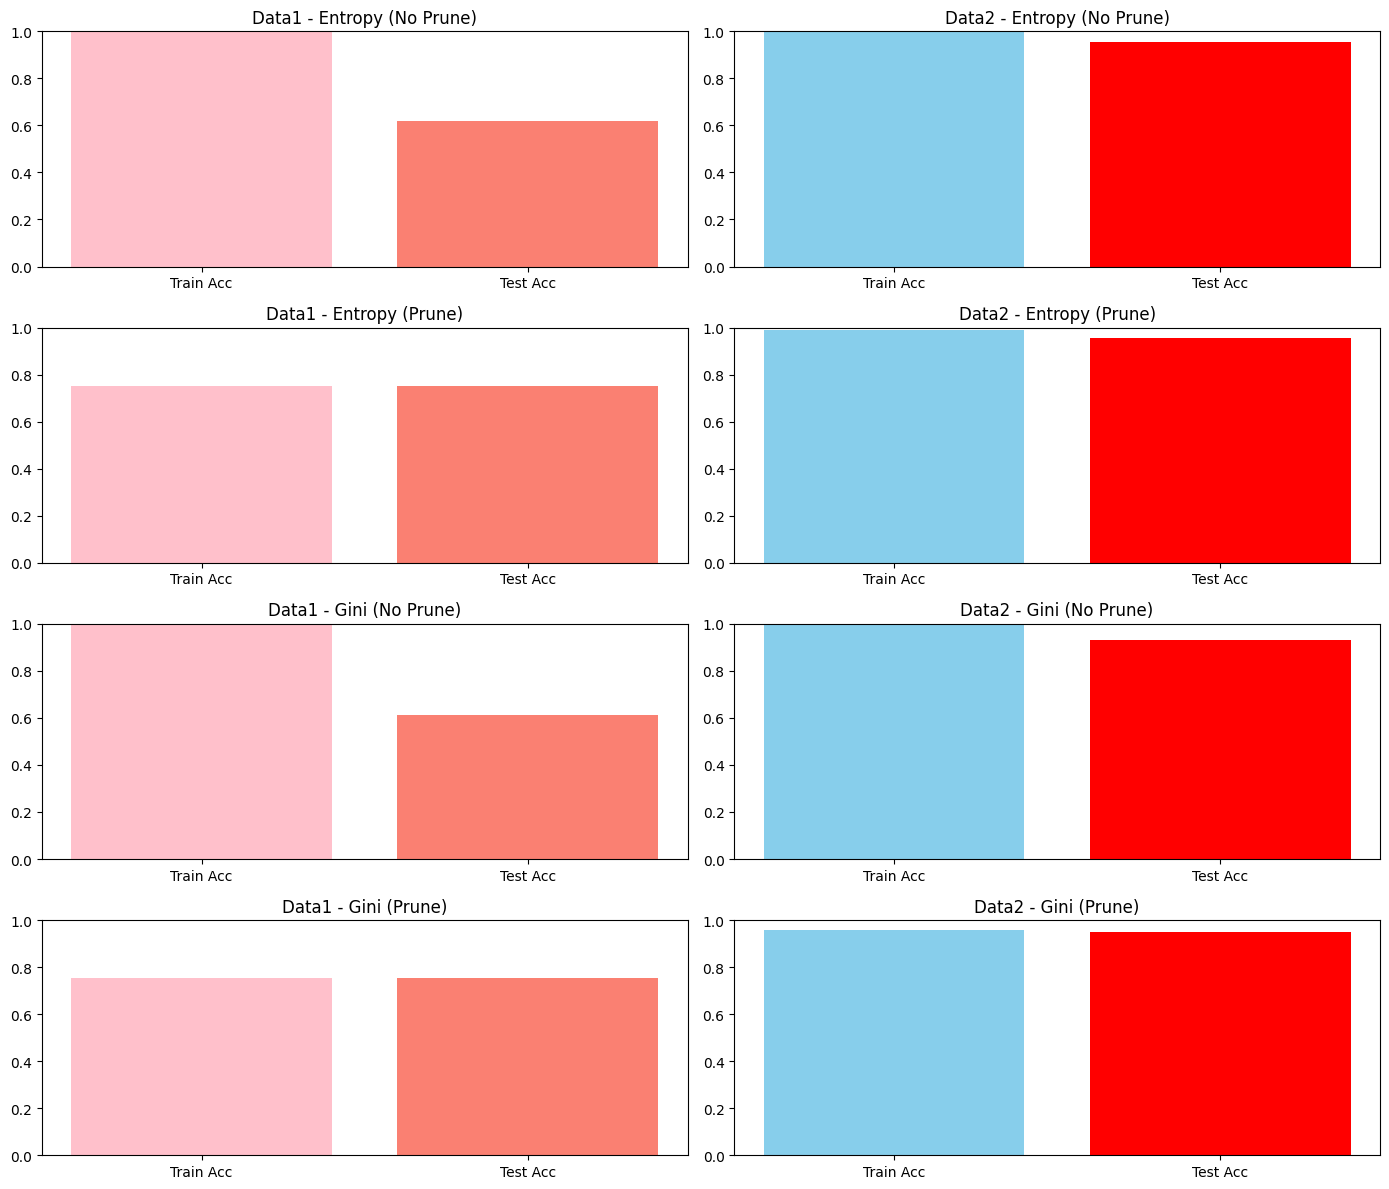

In [61]:
# === Plot 8 Graphs: One per Method for Data1 and Data2 ===
methods = [
    ("Entropy (No Prune)", DecisionTreeClassifier(criterion="entropy")),
    ("Entropy (Prune)", DecisionTreeClassifier(criterion="entropy", ccp_alpha=0.015)),
    ("Gini (No Prune)", DecisionTreeClassifier(criterion="gini")),
    ("Gini (Prune)", DecisionTreeClassifier(criterion="gini", ccp_alpha=0.015))
]

plt.figure(figsize=(14,12))

plot_num = 1
for name, model in methods:
    # Data1
    model.fit(x1_train, y1_train)
    acc_train1 = model.score(x1_train, y1_train)
    acc_test1  = model.score(x1_test, y1_test)

    # Data2
    model.fit(x2_train, y2_train)
    acc_train2 = model.score(x2_train, y2_train)
    acc_test2  = model.score(x2_test, y2_test)

    # Data1 Plot
    plt.subplot(4,2,plot_num)
    plt.bar(["Train Acc", "Test Acc"], [acc_train1, acc_test1], color=["pink","salmon"])
    plt.ylim(0,1)
    plt.title(f"Data1 - {name}")
    plot_num += 1

    # Data2 Plot
    plt.subplot(4,2,plot_num)
    plt.bar(["Train Acc", "Test Acc"], [acc_train2, acc_test2], color=["skyblue","red"])
    plt.ylim(0,1)
    plt.title(f"Data2 - {name}")
    plot_num += 1

plt.tight_layout()
plt.show()
